In [82]:
import numpy as np
import pandas as pd
import os

## Loading in the Data

In [83]:
cell_counts = pd.read_csv("data/cell-count.csv")

In [84]:
len(cell_counts)

10500

In [85]:
len(cell_counts['sample'].unique())

10500

In [86]:
cell_counts.head()

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,prj1,sbj000,melanoma,57,M,miraclib,no,sample00000,PBMC,0,10908,24440,20491,13864,23511
1,prj1,sbj000,melanoma,57,M,miraclib,no,sample00001,PBMC,7,6777,19407,33459,18170,23011
2,prj1,sbj000,melanoma,57,M,miraclib,no,sample00002,PBMC,14,9794,22940,24274,17482,18332
3,prj1,sbj001,carcinoma,68,M,miraclib,yes,sample00003,PBMC,0,10081,20271,36157,14041,12610
4,prj1,sbj001,carcinoma,68,M,miraclib,yes,sample00004,PBMC,7,4372,33778,38293,16527,14933


## Initial Analysis

In [87]:
cell_types = ['b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte']

cell_counts['total_count'] = cell_counts[cell_types].sum(axis=1) # sum across cell types horizontally

rel_freq = cell_counts[['sample', 'total_count']].copy()
rel_freq['population'] = 'b_cell'
rel_freq['count'] = cell_counts['b_cell'].values
rel_freq['percentage'] = rel_freq['count'] / rel_freq['total_count']

rel_freq_copy = rel_freq.copy()
for t in cell_types[1:]: # for loop involves all the other cell types besides initial: b_cell
    rel_freq_copy['population'] = t
    rel_freq_copy['count'] = cell_counts[t].values
    rel_freq_copy['percentage'] = (rel_freq_copy['count'] / rel_freq_copy['total_count']) * 100

    rel_freq = pd.concat([rel_freq, rel_freq_copy], ignore_index=True, axis=0)

rel_freq['population'] = pd.Categorical(rel_freq['population'], categories=cell_types, ordered=True)

rel_freq = rel_freq.sort_values(['sample', 'population'], ascending=True).reset_index(drop=True)
rel_freq.head(10)
    

,sample,total_count,population,count,percentage
0,sample00000,93214,b_cell,10908,0.117021
1,sample00000,93214,cd8_t_cell,24440,26.219237
2,sample00000,93214,cd4_t_cell,20491,21.982749
3,sample00000,93214,nk_cell,13864,14.873302
4,sample00000,93214,monocyte,23511,25.222606
5,sample00001,100824,b_cell,6777,0.067216
6,sample00001,100824,cd8_t_cell,19407,19.248393
7,sample00001,100824,cd4_t_cell,33459,33.185551
8,sample00001,100824,nk_cell,18170,18.021503
9,sample00001,100824,monocyte,23011,22.822939


In [88]:
len(rel_freq)

52500

In [89]:
len(rel_freq) == len(cell_counts) * 5

True

## Statistical Analysis

In [90]:
cell_counts = pd.read_csv("data/cell-count.csv")

cell_types = ['b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte']

cell_counts['total_count'] = cell_counts[cell_types].sum(axis=1) # sum across cell types horizontally

cell_counts = cell_counts[(cell_counts['sample_type'] == 'PBMC') & (cell_counts['condition'] == 'melanoma') & 
                            (cell_counts['treatment'] == 'miraclib')]

response_comp = cell_counts[['subject', 'total_count']].copy()
response_comp['population'] = 'b_cell'
response_comp['count'] = cell_counts['b_cell'].values
response_comp['percentage'] = (response_comp['count'] / response_comp['total_count']) * 100
response_comp['response'] = cell_counts['response'].values

response_comp_copy = response_comp.copy()
for t in cell_types[1:]: # for loop involves all the other cell types besides initial: b_cell
    response_comp_copy['population'] = t
    response_comp_copy['count'] = cell_counts[t].values
    response_comp_copy['percentage'] = (response_comp_copy['count'] / response_comp_copy['total_count']) * 100
    response_comp_copy['response'] = cell_counts['response'].values

    response_comp = pd.concat([response_comp, response_comp_copy], ignore_index=True, axis=0)

response_comp['population'] = pd.Categorical(response_comp['population'], categories=cell_types, ordered=True)

response_comp = response_comp.sort_values(['subject', 'population'], ascending=True).reset_index(drop=True)

response_mapping = {'no': 0, 'yes': 1}
reverse_response_mapping = {0.0: 'no', 1.0: 'yes'}
response_comp['response'] = response_comp['response'].map(response_mapping)

pop_num = {'b_cell': 1, 'cd8_t_cell': 2, 'cd4_t_cell': 3, 'nk_cell': 4, 'monocyte': 5}
num_pop = {1: 'b_cell', 2: 'cd8_t_cell', 3: 'cd4_t_cell', 4: 'nk_cell', 5: 'monocyte'}

response_comp['population'] = response_comp['population'].map(pop_num)

for col in ['total_count', 'count', 'percentage', 'response', 'population']:
    response_comp[col] = pd.to_numeric(response_comp[col])

response_comp = response_comp.groupby(['subject', 'population']).mean().reset_index()

response_comp['population'] = response_comp['population'].map(num_pop)
response_comp['response'] = response_comp['response'].map(reverse_response_mapping)


response_comp.head(10)
    

,subject,population,total_count,count,percentage,response
0,sbj000,b_cell,95620.000000,9159.666667,9.658366,no
1,sbj000,cd8_t_cell,95620.000000,22262.333333,23.393866,no
2,sbj000,cd4_t_cell,95620.000000,26074.666667,27.106476,no
3,sbj000,nk_cell,95620.000000,16505.333333,17.242901,no
4,sbj000,monocyte,95620.000000,21618.000000,22.598391,no
5,sbj002,b_cell,96183.666667,8376.333333,8.750536,no
6,sbj002,cd8_t_cell,96183.666667,23671.666667,24.700366,no
7,sbj002,cd4_t_cell,96183.666667,27832.000000,28.792478,no
8,sbj002,nk_cell,96183.666667,17632.000000,18.389506,no
9,sbj002,monocyte,96183.666667,18671.666667,19.367113,no


In [91]:
len(response_comp)

3280

In [92]:
for t in cell_types:
    print(len(response_comp[response_comp['population'] == t]))

656
656
656
656
656


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

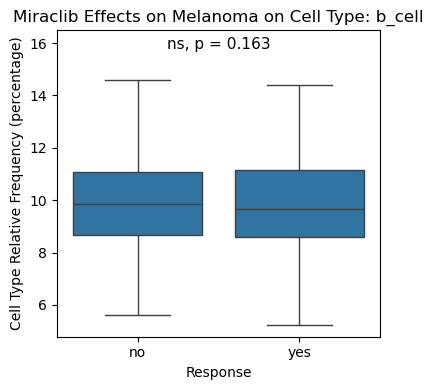

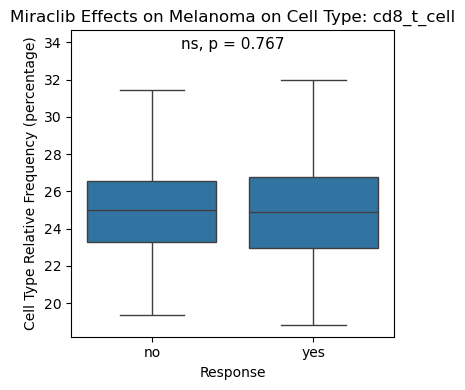

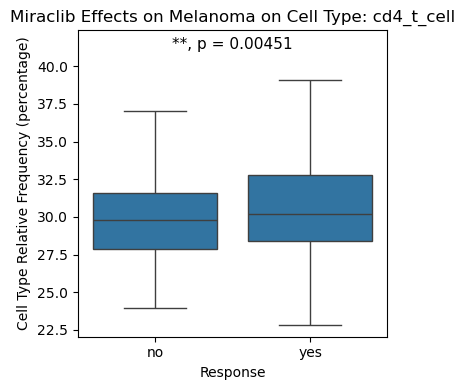

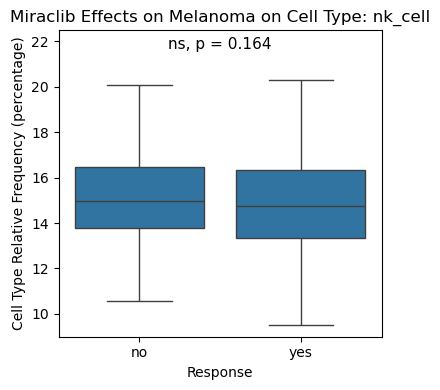

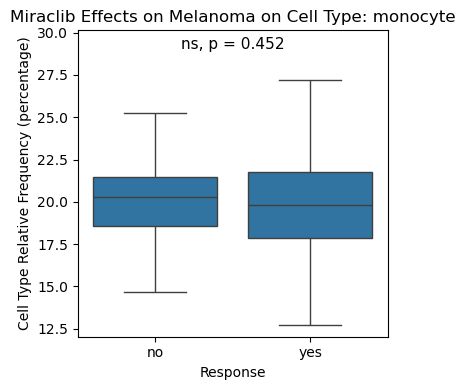

In [94]:
for t in cell_types:
    plot_df = response_comp.copy()
    plot_df = plot_df[plot_df['population'] == t].copy()

    # split groups (response is already "no" and "yes")
    g_no = plot_df.loc[plot_df["response"] == "no", "percentage"].dropna().values
    g_yes = plot_df.loc[plot_df["response"] == "yes", "percentage"].dropna().values

    # Welch t test (mean based)
    if (len(g_no) >= 2) and (len(g_yes) >= 2):
        stat, p = ttest_ind(g_yes, g_no, equal_var=False, nan_policy="omit")
        if p < 0.001:
            sig_text = "***"
        elif p < 0.01:
            sig_text = "**"
        elif p < 0.05:
            sig_text = "*"
        else:
            sig_text = "ns"
        p_text = f"p = {p:.3g}"
    else:
        p = np.nan
        sig_text = "na"
        p_text = "p = na"

    plt.figure(figsize=(4, 4))

    # only include categories that are present to avoid seaborn position mismatch
    desired_order = ["no", "yes"]
    present_order = [x for x in desired_order if x in plot_df["response"].dropna().unique()]

    ax = sns.boxplot(
        data=plot_df,
        x="response",
        y="percentage",
        order=present_order,
        showfliers=False
    )

    ax.set_title('Miraclib Effects on Melanoma on Cell Type: ' + t)
    ax.set_xlabel("Response")
    ax.set_ylabel("Cell Type Relative Frequency (percentage)")

    # annotation placement
    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    y_label = y_max + 0.06 * y_range
    ax.set_ylim(y_min, y_max + 0.14 * y_range)

    x_center = float(np.mean(ax.get_xticks())) if len(ax.get_xticks()) else 0.0
    ax.text(
        x_center, y_label,
        f"{sig_text}, {p_text}",
        ha="center",
        va="bottom",
        fontsize=11
    )

    plt.tight_layout()
    plt.show()

## Google Form Question

In [95]:
cell_counts = pd.read_csv("data/cell-count.csv")

is_melanoma = cell_counts['condition'] == 'melanoma'
is_male = cell_counts['sex'] == 'M'
is_baseline = cell_counts['time_from_treatment_start'] == 0
is_responder = cell_counts['response'] == 'yes'

print(cell_counts[is_melanoma & is_male & is_baseline & is_responder]['b_cell'].mean())

10206.150515463918


## Create Metadata Table

In [96]:
cell_counts = pd.read_csv("data/cell-count.csv")

metadata = cell_counts.copy().drop(columns=cell_types)
metadata.head()

metadata.to_csv("sample-metadata.csv")